In [4]:
from app import data
import pandas as pd
# Convert categorical responses to numerical codes
# Example: Gender coding
data['Gender'] = data['Gender'].map({'1. Male': 1, '2. Female': 2})
data['With the current system, can you self-explore it?'] = data['With the current system, can you self-explore it?'].map({'1. Yes': 1, '2. No': 2})
# Example: How frequently do you use this system in a month? remove lan '< 2 times/lần' -> '< 2 times'
data['How frequently do you use this system in a month?'] = data['How frequently do you use this system in a month?'].str.replace('/lần', '')

# Example: Likert scale items
# Apply this logic from the columns has index 13 to 37 ignore the t 38 and get from 39 to 43
# Define the columns containing Likert scale responses

likert_columns = data.columns[13:37].append(data.columns[38:46])
likert_scale_mapping = {
    '1 - Very Difficult to use': 1,
    '2 - Somewhat Difficult to use': 2,
    '3 - Neutral': 3,
    '4 - Somewhat Easy to use': 4,
    '5 - Very Easy to use': 5,
    '2 - Somewhat Difficult/ Khó khăn': 2,
    '2 - Somewhat Difficult': 2,   
    '3 -  Neutral / Bình thường': 3,
    '3 -  Neutral': 3,
    '4 - Somewhat Easy': 4,
    '4 - Somewhat Easy/ Dễ dàng': 4,
    '5 - Very Easy': 5,
    '5 - Very Easy/ Rất dễ dàng': 5,
    '1 - Very Difficult to use': 1,
    '1 - Very Difficult to use/ Rất khó khăn để sử dụng': 1,
    '2 - Somewhat Difficult to use': 2,
    '2 - Somewhat Difficult to use/ Khó khăn đề sử dụng': 2,
    '3 - Neutral': 3,
    '3 - Neutral ': 3,
    '3 - Neutral/ Bình thường': 3,
    '4 - Somewhat Easy to use': 4,
    '4 - Somewhat Easy to use/ Dễ dàng sử dụng': 4,
    '5 - Very Easy to use': 5,
    '5 - Very Easy to use/ Rất dễ dàng sử dụng': 5,
    'Always': 1,
    'Always/ Luôn luôn': 1,
    'Never': 5,
    'Never/ Không bao giờ': 5,
    'Rarely': 4,
    'Rarely/ Hiếm khi': 4,
    'Sometimes': 3,
    'Sometimes/ Thỉnh thoảng': 3,
    'Usually': 2,
    'Usually/ Thường xuyên': 2,
    'Somewhat Useful': 4,
    'Somewhat Useful/ Khá hữu ích': 4,
    'Somewhat Useless': 2,
    'Somewhat Useless/ Khá không hiệu quả': 2,
    'Useful': 5,
    'Useful/ Hữu ích': 5,
    'Somewhat Difficult': 2,
    '2 - Somewhat Difficult/ Khó khăn': 2,
    'Somewhat Easy': 4,
    '4 - Somewhat Easy/ Dễ dàng': 4,
    'Very Easy': 5,
    '5 - Very Easy/ Rất dễ dàng': 5,
    'Somewhat unsatisfied' : 2,
    'Somewhat satisfied' : 4,
    'Very satisfied' : 5,
    'Neutral' : 3,
    'Very unsatisfied' : 1,
    '3 - Neutral /Bình thường': 3,
    'Rarely / Hiếm khi': 2,
    'Neutral / Bình thường': 3,
    'Very Difficult': 1,
    'Never/Không bao giờ': 1,
    'Useless/ Không hiệu quả': 1,
    'Useless': 1,
    '2 - Only a little': 2,
    '2 - Only a little/ Chỉ một ít': 2,
    '3 - To some extent': 3,
    '3 - To some extent/ Tương đối': 3,
    '4 - Rather much': 4,
    '4 - Rather much/ Khá nhiều': 4,
    '5 - Very much': 5,
    '5 - Very much/ Rất nhiều': 5,
    '1 - Not at all': 1,
    '1 - Not at all/ Không có gì': 1,
    'Strongly Agree': 5,
    'Strongly Agree/ Hoàn toàn đồng ý': 5,
    'Agree': 4,
    'Agree/ Đồng ý': 4,
    'Neutral': 3,
    'Neutral/ Bình thường': 3,
    'Disagree': 2,
    'Disagree/ Không đồng ý': 2,
    'Strongly Disagree': 1,
    'Strongly Disagree/ Hoàn toàn không đồng ý': 1,
    'No training was provided': 0,
    'No training was provided/ Không có buổi đào tạo nào': 0,
    'No, I did not': 1,
    'No, I did not/ Không, tôi đã không tham dự': 1,
    'Yes, I attended/ Có, tôi đã tham dự': 2,
    'Yes, I attended': 2,
    '5 - Very clear': 5,
    '5 - Very clear/ Rất rõ ràng': 5,
    '4 - Clear': 4,
    '4 - Clear/ Rõ ràng': 4,
    '3 - Neutral': 3,
    '3 - Neutral/ Bình thường': 3,
    '2 - Unclear': 2,
    '2 - Unclear/ Không rõ ràng': 2,
    '1 - Very unclear': 1,
    '1 - Very unclear/ Rất không rõ ràng': 1,
    '5 - Very competent/ Năng lực rất tốt': 5,
    '5 - Very competent': 5,
    '4 - Competent/ Có năng lực': 4,
    '4 - Competent': 4,
    '3 - Neutral': 3,
    '3 - Neutral/ Bình thường': 3,
    '2 - Incompetent/ Không có năng lực': 2,
    '2 - Incompetent': 2,
    '1 - Very incompetent/ Rất không có năng lực': 1,
    '1 - Very incompetent': 1,
    '3 - Neutral/Bình thường': 3,
    '5 - Very helpful/ Rất hữu ích': 5,
    '4 - Quite helpful/ Khá hữu ích': 4,
    '0 - No material was provided/ Không có tài liệu đào tạo': 0,
    '0 - No material was provided': 0,
    '2 - Not very helpful': 2,
    '2 - Not very helpful/ Không hữu ích lắm': 2,
    '3 - Neutral/Bình thường': 3,
    '4 - Quite helpful': 4,
    '4 - Quite helpful/ Khá hữu ích': 4,
    '5 - Very helpful/ Rất hữu ích': 5,
    '5 - Very helpful': 5,
}


# Apply mappings
for column in likert_columns:
    data[column] = data[column].replace(likert_scale_mapping)

# After applying the mappings to the Likert scale columns
# You can fill missing values with -1 as you mentioned
data[likert_columns] = data[likert_columns].fillna(-1)
# Save the cleaned and mapped data to an Excel file, checking the path
# output_path = 'Updated_Cleaned_Survey_Data_V1.0.xlsx'  # Adjust path as necessary
# data.to_excel(output_path, index=False)

# Load the survey data from the provided Excel file
file_path = 'source/Updated_Cleaned_Survey_Data_V1.0.xlsx'
data = pd.read_excel(file_path)
# Specify the column name


In [ ]:
column_name = 'Which system do you usually use for your daily tasks? Please use this system as the reference for other questions in this survey.'

# Standardize the column to only keep the first system mentioned, assuming systems are separated by commas
data[column_name] = data[column_name].str.split(',').str[0].str.upper().str.strip().replace('-', '')

#Change value of the colum_name to Other if the value is not in the list ['D365', 'OVS', 'BIPO']
data[column_name] = data[column_name].apply(lambda x: x if x in ['D365', 'OVS', 'BIPO'] else 'Other')

# Save the changes back to the Excel file or display the cleaned data
data.to_excel('Updated_Cleaned_Survey_Data_V1.0.xlsx', index=False)

In [ ]:
import matplotlib.pyplot as plt

# Bar Chart for Department Distributionp
departments = data['Your Department'].value_counts()
plt.figure(figsize=(10, 6))
departments.plot(kind='bar', color='skyblue')
plt.xlabel('Department')
plt.ylabel('Number of Respondents')
plt.title('Distribution of Respondents by Department')
plt.xticks(rotation=45)
plt.show()


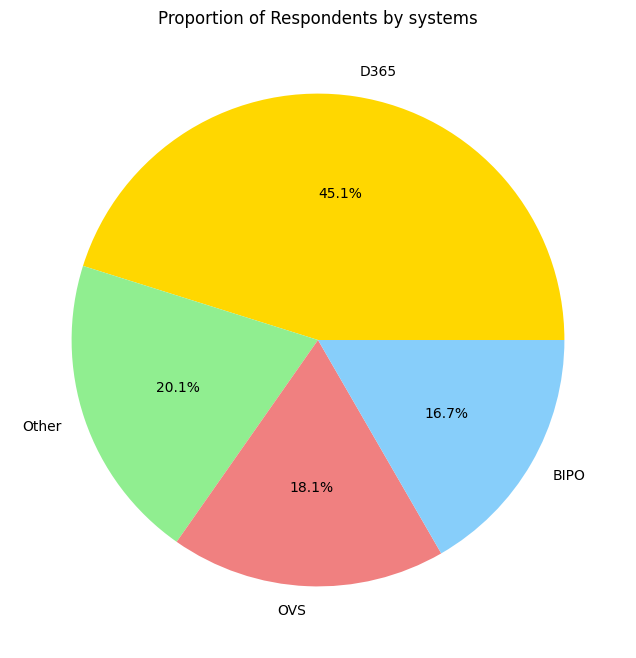

In [3]:
# Pie Chart for systems Distribution
job_levels = data['Which system do you usually use for your daily tasks? Please use this system as the reference for other questions in this survey.'].value_counts()
plt.figure(figsize=(8, 8))
job_levels.plot(kind='pie', autopct='%1.1f%%', colors=['gold', 'lightgreen', 'lightcoral', 'lightskyblue'])
plt.title('Proportion of Respondents by systems')
plt.ylabel('')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp

# Assuming 'data' has already been loaded and processed correctly
# Define the columns range for Likert scale data
likert_columns_h1 = data.columns[13:37].union(data.columns[38:42])

# Set the satisfaction threshold
threshold = 3

# Perform one-sample t-tests against the threshold
t_test_results = {column: ttest_1samp(data[column].dropna(), threshold) for column in likert_columns_h1}
t_test_df = pd.DataFrame({
    "Column": [col for col in likert_columns_h1],
    "Mean Score": [data[col].mean() for col in likert_columns_h1],
    "p-value": [t_test_results[col].pvalue for col in likert_columns_h1],
    "t-statistic": [t_test_results[col].statistic for col in likert_columns_h1]
})

# Determine the result of the hypothesis based on p-value
t_test_df['Hypothesis Result'] = t_test_df['p-value'].apply(lambda p: 'Reject H0' if p < 0.05 else 'Fail to Reject H0')

# Count the number of items below the threshold
num_below_threshold = (t_test_df['Mean Score'] < threshold).sum()

# Create visualizations
plt.figure(figsize=(14, 10))
bars = plt.barh(t_test_df['Column'], t_test_df['Mean Score'], color=['red' if x < threshold else 'green' for x in t_test_df['Mean Score']])
plt.axvline(x=threshold, color='blue', linestyle='--', label='Neutral Threshold = 3')
plt.xlabel('Mean Score')
plt.ylabel('Survey Item')
plt.title('UI/UX Satisfaction Levels')

# Annotate number of items below threshold
plt.annotate(f'Items below threshold: {num_below_threshold}', xy=(0.5, 0.5), xycoords='figure fraction', horizontalalignment='center', verticalalignment='center', fontsize=12, color='red')

# Legend to explain the colors
plt.legend(handles=[plt.Line2D([0], [0], color='green', lw=4, label='Satisfactory'), plt.Line2D([0], [0], color='red', lw=4, label='Unsatisfactory')])

plt.show()

# Print conclusion based on the analysis
print(f"Number of items below the satisfaction threshold: {num_below_threshold}")
if num_below_threshold > 0:
    print("Conclusion: Reject H0 - The UI/UX is not good enough in certain areas.")
else:
    print("Conclusion: Fail to Reject H0 - The UI/UX is generally considered good enough.")



In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp

# Column name for the system used as a reference
system_column_name = 'Which system do you usually use for your daily tasks? Please use this system as the reference for other questions in this survey.'

# Define columns by category accurately matching your dataset
system_satisfaction_columns = [
    'How SATISFIED are you with the system in terms of. Data quality',
    'How SATISFIED are you with the system in terms of. Generating reports',
    'How SATISFIED are you with the system in terms of. The range of features and functions',
    'How SATISFIED are you with the system in terms of. The speed and responsiveness'
]

system_usability_columns = [
    'How easy do you use the system?',
    'Rate the EASE OF USE of the following feature according to your experience. Automated notifications',
    'Rate the EASE OF USE of the following feature according to your experience. Checking Information',
    'Rate the EASE OF USE of the following feature according to your experience. Customizable reporting tools',
    'Rate the EASE OF USE of the following feature according to your experience. Data Input',
    'Rate the EASE OF USE of the following feature according to your experience. Extract Data',
    'Rate the EASE OF USE of the following feature according to your experience. Streamline process',
    'Rate the EASE OF USE of the following feature according to your experience. Visualize reports'
]

system_efficiency_improvement_columns = [
    'How has the system improved your work efficiency?'
]

system_issues_columns = [
    'Rate the FREQUENCY of the following ISSUES according to your experience with the system. Inaccessible on mobile device',
    'Rate the FREQUENCY of the following ISSUES according to your experience with the system. Incorrect data or information',
    'Rate the FREQUENCY of the following ISSUES according to your experience with the system. Navigation',
    'Rate the FREQUENCY of the following ISSUES according to your experience with the system. Slow performances or system c',
    'Rate the FREQUENCY of the following ISSUES according to your experience with the system. Trouble logging in or session'
]

system_usefulness_columns = [
    'Rate the USEFULNESS of the system according to your experience. Achieve desired outcome',
    'Rate the USEFULNESS of the system according to your experience. Compliance with relevant standards and regulations',
    'Rate the USEFULNESS of the system according to your experience. Data quality',
    'Rate the USEFULNESS of the system according to your experience. Increase the work performance',
    'Rate the USEFULNESS of the system according to your experience. Streamline process'
]

future_intentions_visual_appeal_columns = [
    'Rate the following STATEMENTS according to your experience. I intend to increase my usage on the system in the future',
    'Rate the following STATEMENTS according to your experience. I will use the system more often because it is easy to use',
    'Rate the following STATEMENTS according to your experience. I will use the system more often because it is useful',
    'What do you think of the visual appeal of the system\'s user interface?'
]

# Case 1


# Perform one-sample t-tests against the threshold for each category
results = {}
categories = [('System Satisfaction', system_satisfaction_columns), ('System Usability', system_usability_columns),
              ('System Efficiency and Improvement', system_efficiency_improvement_columns), ('System Issues', system_issues_columns),
              ('System Usefulness', system_usefulness_columns), ('Future Intentions and Visual Appeal', future_intentions_visual_appeal_columns)]

# Combine all categories for overall analysis
all_columns = (system_satisfaction_columns + system_usability_columns +
               system_efficiency_improvement_columns + system_issues_columns +
               system_usefulness_columns + future_intentions_visual_appeal_columns)


# Define the threshold for satisfaction
threshold = 3

# Function to perform t-test and visualize results for each category
def analyze_category_satisfaction(data, category_name, columns, threshold):
    print(f"Processing {category_name}")
    # Perform t-tests and gather results
    t_test_results = {col: ttest_1samp(data[col].dropna(), threshold) for col in columns}
    t_test_df = pd.DataFrame({
        "Column": columns,
        "Mean Score": [data[col].mean() for col in columns],
        "p-value": [result.pvalue for result in t_test_results.values()],
        "t-statistic": [result.statistic for result in t_test_results.values()],
        "Hypothesis Result": ['Reject H0' if result.pvalue < 0.05 else 'Fail to Reject H0' for result in t_test_results.values()]
    })

    # Visualization
    plt.figure(figsize=(14, 6))
    plt.barh(t_test_df['Column'], t_test_df['Mean Score'], color=['red' if x < threshold else 'green' for x in t_test_df['Mean Score']])
    plt.axvline(x=threshold, color='blue', linestyle='--', label='Neutral Threshold = 3')
    plt.xlabel('Mean Score')
    plt.ylabel('Survey Item')
    plt.title(f'UI/UX Satisfaction Levels - {category_name}')
    plt.legend()
    plt.show()


# Identify unique systems
unique_systems = data[system_column_name].unique()

# Loop through each system and analyze each category
for system in unique_systems:
    system_data = data[data[system_column_name] == system]
    print(f"\nAnalysis for system: {system}\n{'='*60}")
    for category_name, columns in categories:
        analyze_category_satisfaction(system_data, category_name, columns, threshold)



In [ ]:
import pandas as pd
from scipy.stats import ttest_1samp
import matplotlib.pyplot as plt

# Assume 'data' is your DataFrame containing all survey responses

def perform_t_tests(data, categories, threshold=3):
    for category_name, columns in categories.items():
        print(f"\n{category_name} Analysis:")
        for col in columns:
            # Drop NA values for clean testing
            sample_data = data[col].dropna()
            t_stat, p_value = ttest_1samp(sample_data, threshold)
            print(f"{col}: Mean = {sample_data.mean():.2f}, t-stat = {t_stat:.3f}, p-value = {p_value:.4f}")

categories = {
    "System Satisfaction": system_satisfaction_columns,
    "System Usability": system_usability_columns,
    "System Efficiency": system_efficiency_improvement_columns,
    "System Issues": system_issues_columns,
    "System Usefulness": system_usefulness_columns,
    "Future Intentions": future_intentions_visual_appeal_columns
}

perform_t_tests(data, categories)


In [ ]:
import statsmodels.api as sm

# Calculate average scores for each category if not already done
data['Avg Usability'] = data[system_usability_columns].mean(axis=1, skipna=True)
data['Avg Efficiency'] = data[system_efficiency_improvement_columns].mean(axis=1, skipna=True)

# Prepare X and y for regression
X = data['Avg Usability']
y = data['Avg Efficiency']
X = sm.add_constant(X)  # adds a constant term to the predictor

model = sm.OLS(y, X, missing='drop').fit()  # Fit model
print(model.summary())

# Plotting
plt.figure(figsize=(8, 5))
plt.scatter(X['Avg Usability'], y, alpha=0.5)
plt.plot(X['Avg Usability'], model.predict(X), 'r')
plt.title('Impact of Usability on Efficiency')
plt.xlabel('Average Usability')
plt.ylabel('Average Efficiency')
plt.show()


In [9]:
import pandas as pd

# Assuming 'data' is your DataFrame containing all survey responses

for category_name, columns in categories.items():
    data[f"Avg {category_name}"] = data[columns].mean(axis=1, skipna=True)


In [14]:
category_pairs = [
    ("System Usability", "System Efficiency"),
    ("System Usability", "System Satisfaction"),
    ("System Usability", "System Usefulness"),
    ("System Usability", "Future Intentions"),
    
    ("System Satisfaction", "System Efficiency"),
    ("System Satisfaction", "System Usefulness"),
    ("System Satisfaction", "System Issues"),
    ("System Satisfaction", "Future Intentions"),
    
    ("System Efficiency", "System Satisfaction"),
    ("System Efficiency", "System Usefulness"),
    ("System Efficiency", "Future Intentions"),
    
    ("System Issues", "System Satisfaction"),
    ("System Issues", "System Usability"),
    ("System Issues", "System Efficiency"),
    ("System Issues", "System Usefulness"),
    ("System Issues", "Future Intentions"),
    
    ("System Usefulness", "System Satisfaction"),
    ("System Usefulness", "System Usability"),
    ("System Usefulness", "System Efficiency"),
    ("System Usefulness", "Future Intentions"),
    
    ("Future Intentions", "System Satisfaction"),
    ("Future Intentions", "System Usability"),
    ("Future Intentions", "System Efficiency"),
    ("Future Intentions", "System Usefulness")
]



In [ ]:
import statsmodels.api as sm

impact_results = []

for predictor, outcome in category_pairs:
    X = data[f"Avg {predictor}"]
    y = data[f"Avg {outcome}"]
    X = sm.add_constant(X)  # Adds a constant term to the predictor

    model = sm.OLS(y, X, missing='drop').fit()  # Fit model
    coeff = model.params[1]  # Get the coefficient for the predictor
    p_value = model.pvalues[1]  # Get the p-value for the predictor

    # Store the results
    impact_results.append((predictor, outcome, coeff, p_value))

# Sort results by the absolute value of coefficients (impact strength), descending
impact_results.sort(key=lambda x: abs(x[2]), reverse=True)


In [16]:
for predictor, outcome, coeff, p_value in impact_results:
    impact_level = "Strong" if abs(coeff) > 0.5 else "Moderate" if abs(coeff) > 0.3 else "Weak"
    print(f"Impact from {predictor} to {outcome}: {coeff:.3f} ({impact_level}), p-value: {p_value:.4f}")


Impact from Future Intentions to System Efficiency: 1.075 (Strong), p-value: 0.0000
Impact from System Usability to System Satisfaction: 0.929 (Strong), p-value: 0.0000
Impact from Future Intentions to System Satisfaction: 0.911 (Strong), p-value: 0.0000
Impact from Future Intentions to System Usefulness: 0.909 (Strong), p-value: 0.0000
Impact from Future Intentions to System Usability: 0.853 (Strong), p-value: 0.0000
Impact from System Usefulness to System Efficiency: 0.837 (Strong), p-value: 0.0000
Impact from System Usability to System Efficiency: 0.824 (Strong), p-value: 0.0000
Impact from System Usability to Future Intentions: 0.774 (Strong), p-value: 0.0000
Impact from System Usability to System Usefulness: 0.762 (Strong), p-value: 0.0000
Impact from System Satisfaction to System Efficiency: 0.707 (Strong), p-value: 0.0000
Impact from System Satisfaction to System Usefulness: 0.665 (Strong), p-value: 0.0000
Impact from System Usefulness to System Satisfaction: 0.618 (Strong), p-v

In [19]:
# Assuming 'impact_results' is already populated from previous regression analyses
for predictor, outcome, coeff, p_value in impact_results:
    # Determine the impact level based on the coefficient magnitude
    if abs(coeff) >= 0.5:
        impact_level = "Strong"
    elif abs(coeff) >= 0.3:
        impact_level = "Moderate"
    else:
        impact_level = "Weak"

    # Determine the direction of impact
    direction = "positive" if coeff > 0 else "negative"

    # Reporting
    print(f"Impact from {predictor} to {outcome}: Coefficient = {coeff:.3f} ({impact_level}, {direction}), p-value = {p_value:.4f}")


Impact from Future Intentions to System Efficiency: Coefficient = 1.075 (Strong, positive), p-value = 0.0000
Impact from System Usability to System Satisfaction: Coefficient = 0.929 (Strong, positive), p-value = 0.0000
Impact from Future Intentions to System Satisfaction: Coefficient = 0.911 (Strong, positive), p-value = 0.0000
Impact from Future Intentions to System Usefulness: Coefficient = 0.909 (Strong, positive), p-value = 0.0000
Impact from Future Intentions to System Usability: Coefficient = 0.853 (Strong, positive), p-value = 0.0000
Impact from System Usefulness to System Efficiency: Coefficient = 0.837 (Strong, positive), p-value = 0.0000
Impact from System Usability to System Efficiency: Coefficient = 0.824 (Strong, positive), p-value = 0.0000
Impact from System Usability to Future Intentions: Coefficient = 0.774 (Strong, positive), p-value = 0.0000
Impact from System Usability to System Usefulness: Coefficient = 0.762 (Strong, positive), p-value = 0.0000
Impact from System S

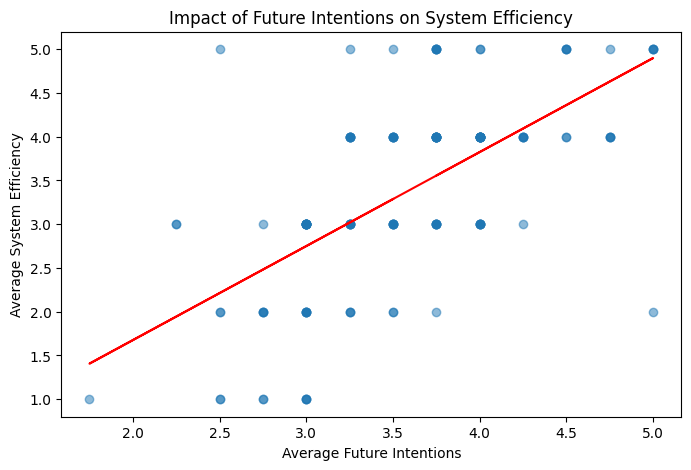

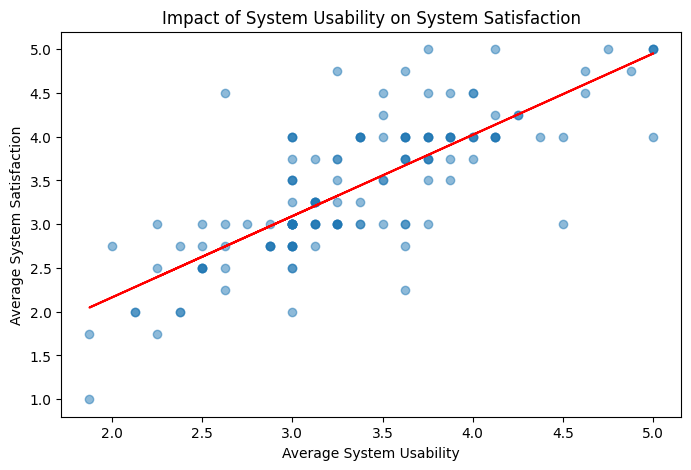

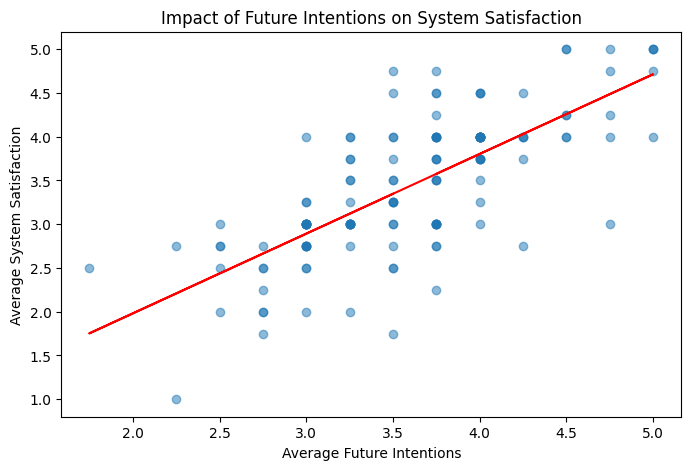

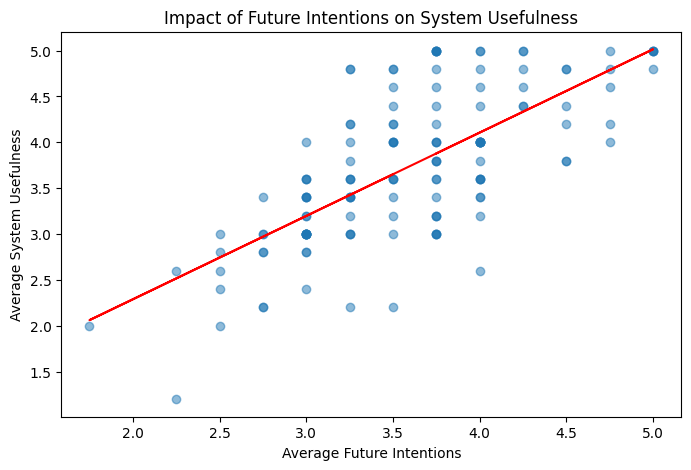

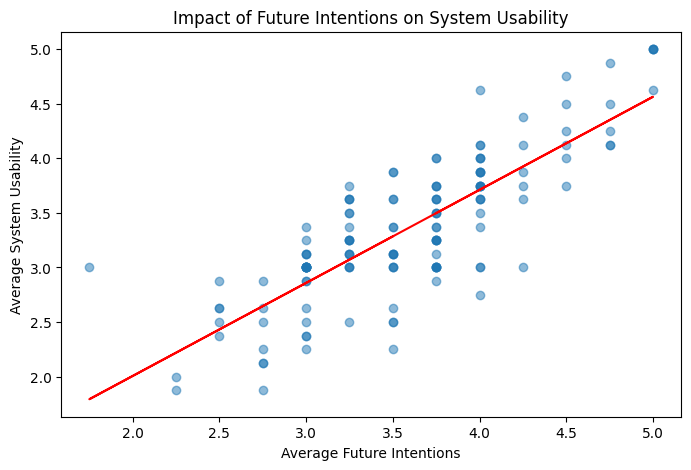

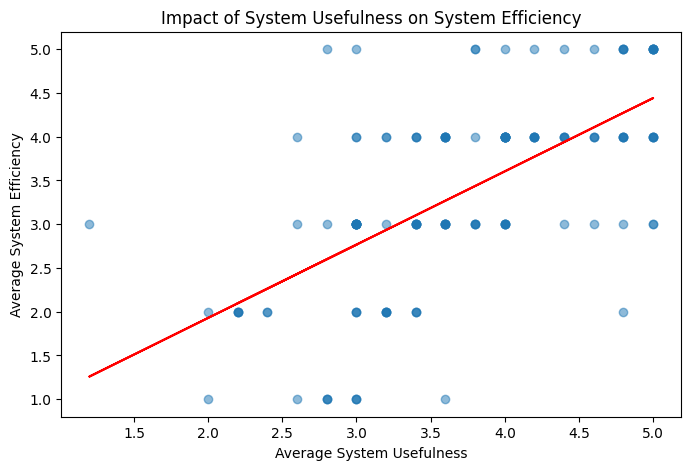

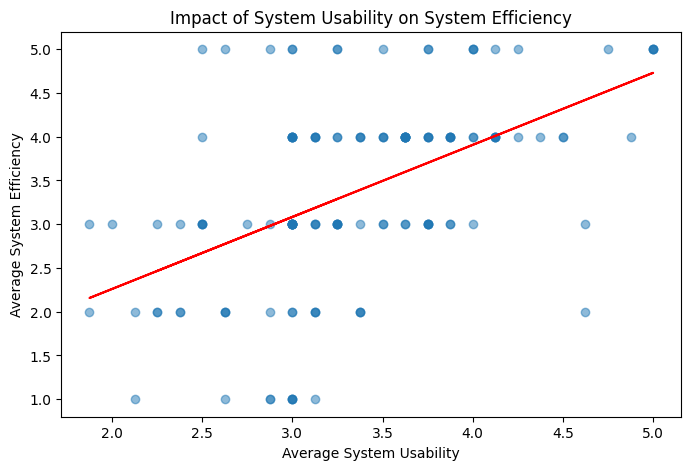

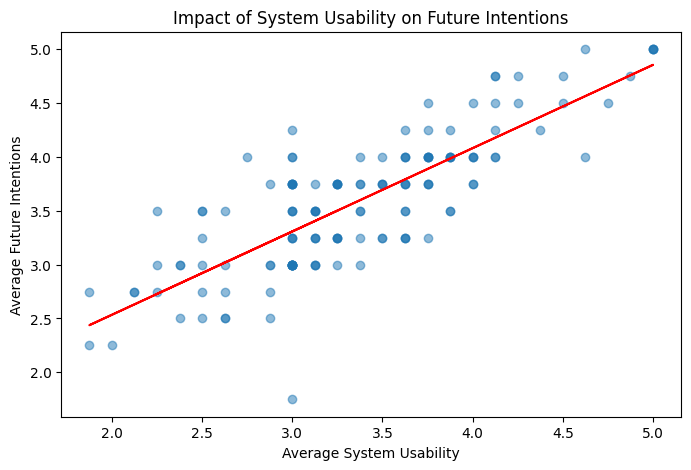

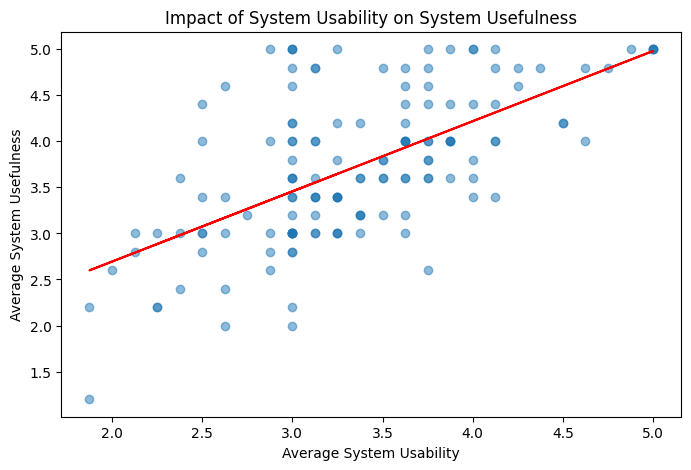

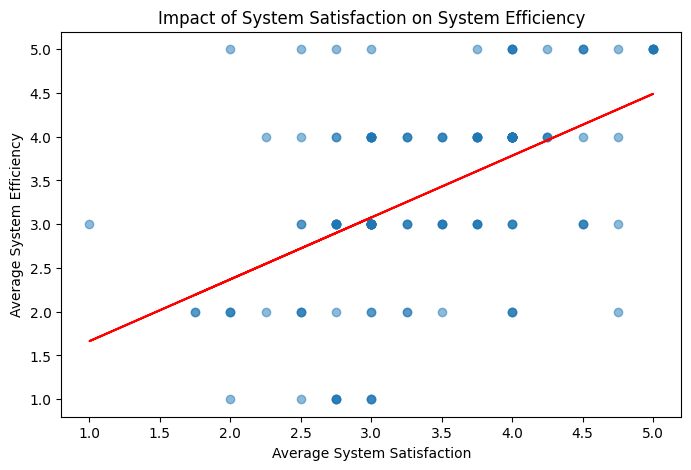

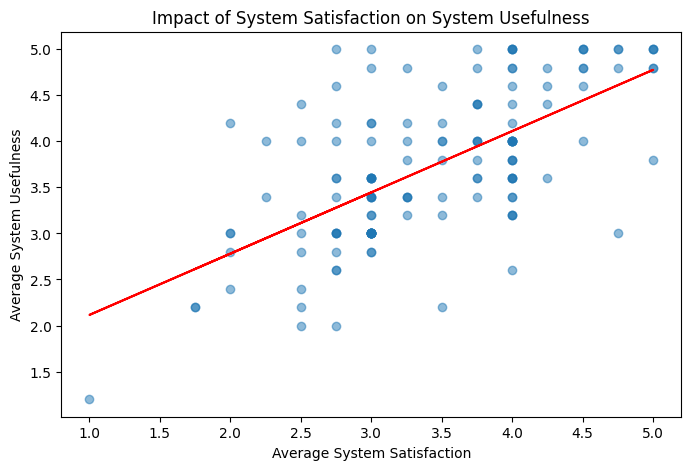

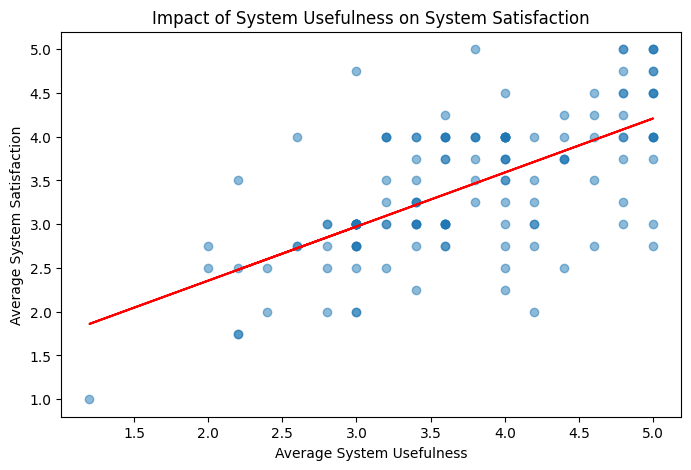

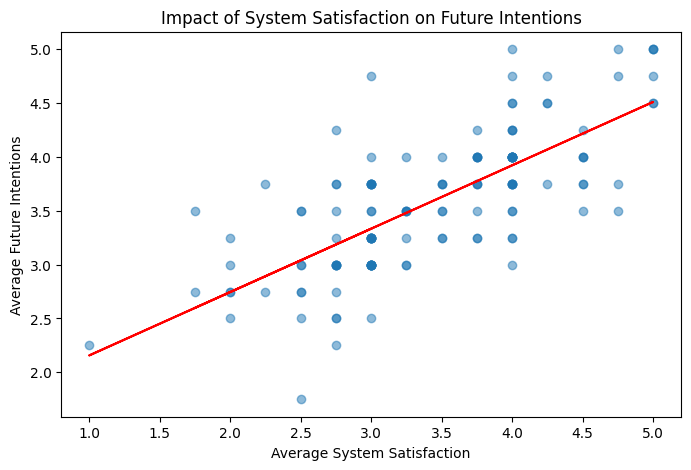

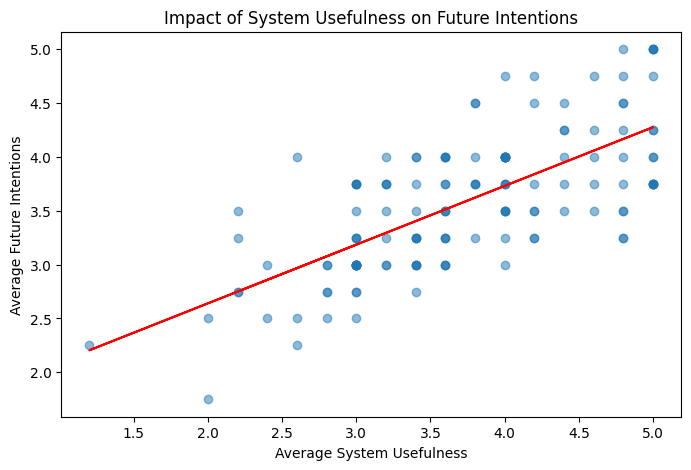

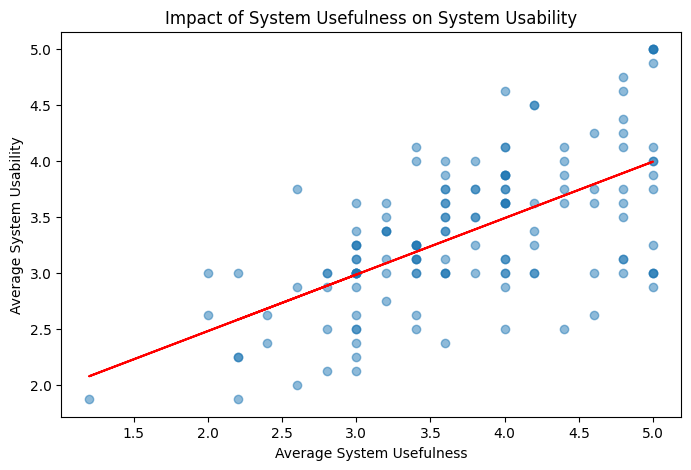

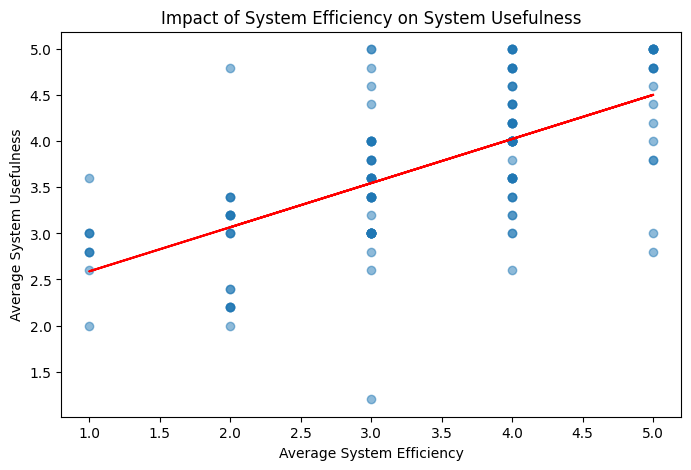

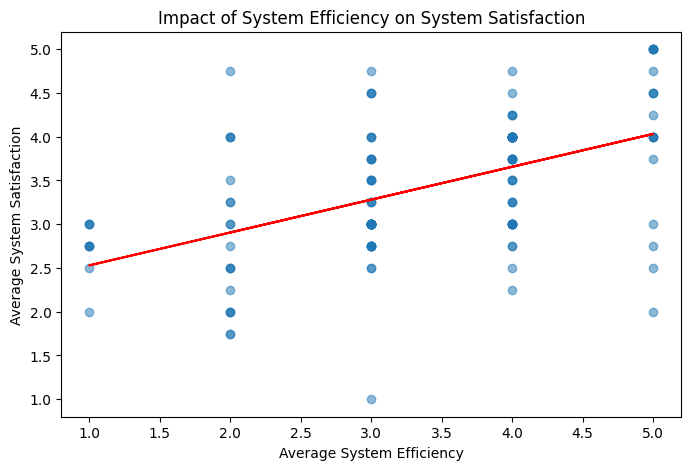

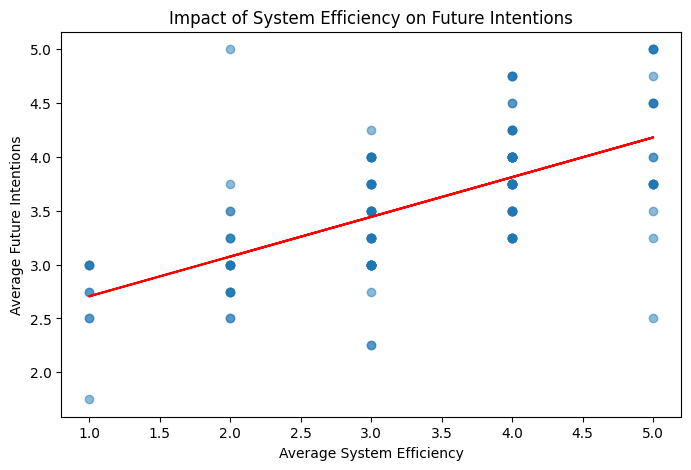

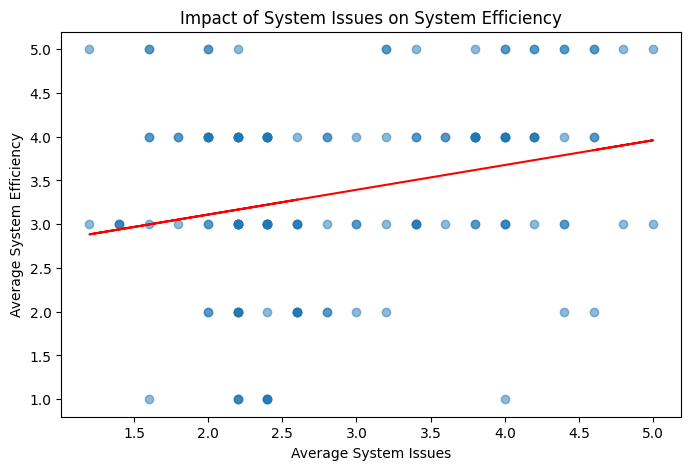

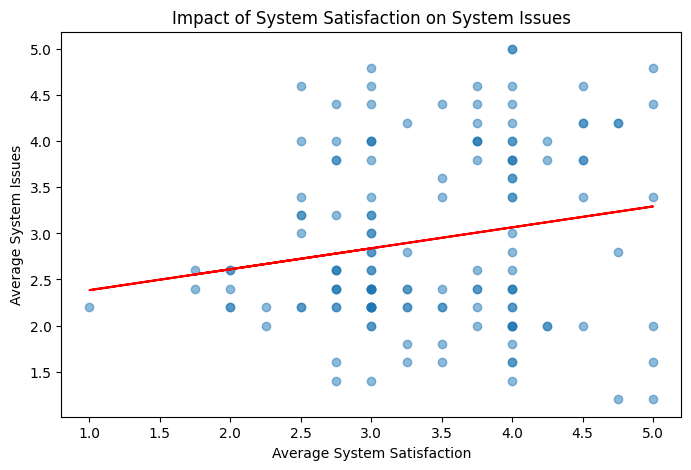

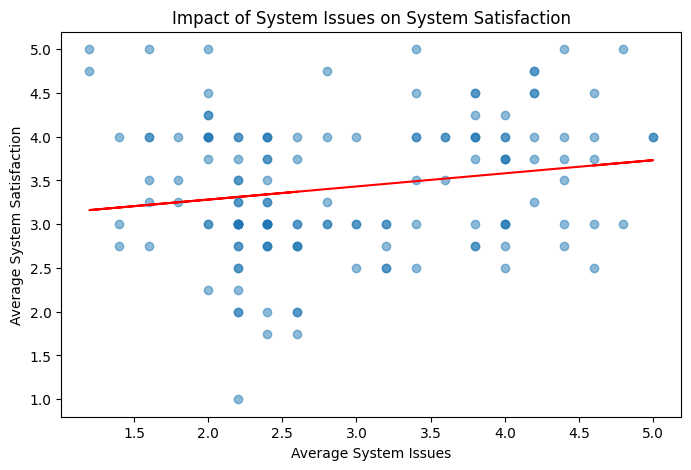

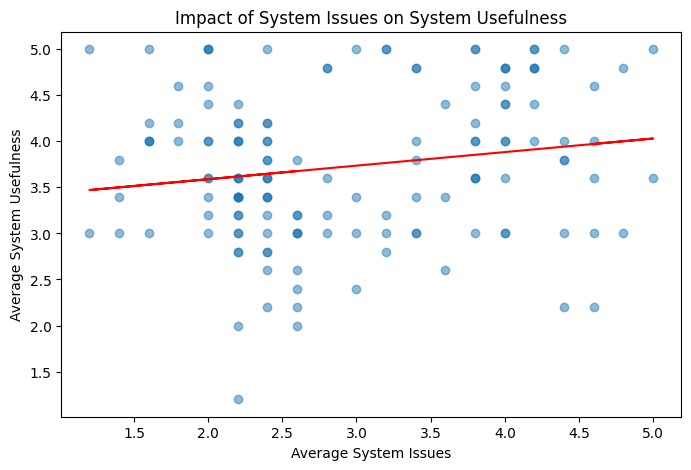

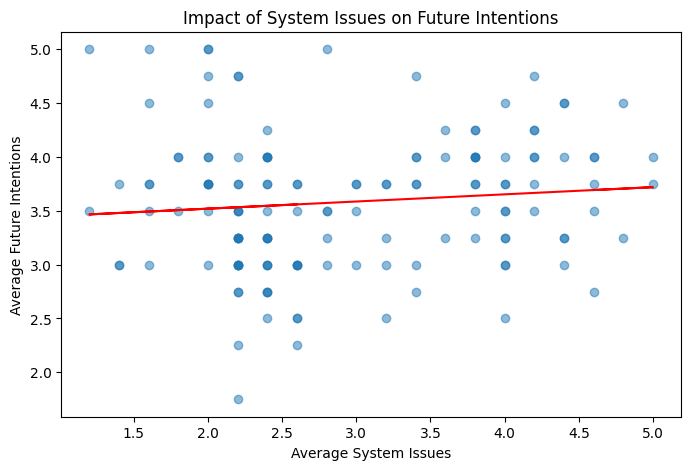

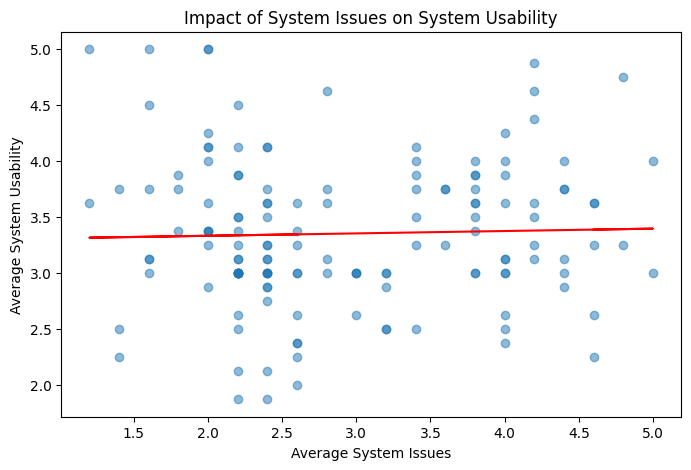

In [17]:
import matplotlib.pyplot as plt

for predictor, outcome, coeff, p_value in impact_results:
    X = data[f"Avg {predictor}"]
    y = data[f"Avg {outcome}"]
    X = sm.add_constant(X)
    model = sm.OLS(y, X, missing='drop').fit()

    plt.figure(figsize=(8, 5))
    plt.scatter(X.iloc[:, 1], y, alpha=0.5)  # Assuming X.iloc[:, 1] is your predictor after adding constant
    plt.plot(X.iloc[:, 1], model.predict(X), 'r')
    plt.title(f'Impact of {predictor} on {outcome}')
    plt.xlabel(f'Average {predictor}')
    plt.ylabel(f'Average {outcome}')
    plt.show()


T-Statistic: 30.474255574891, P-Value: 1.3496805370308889e-42


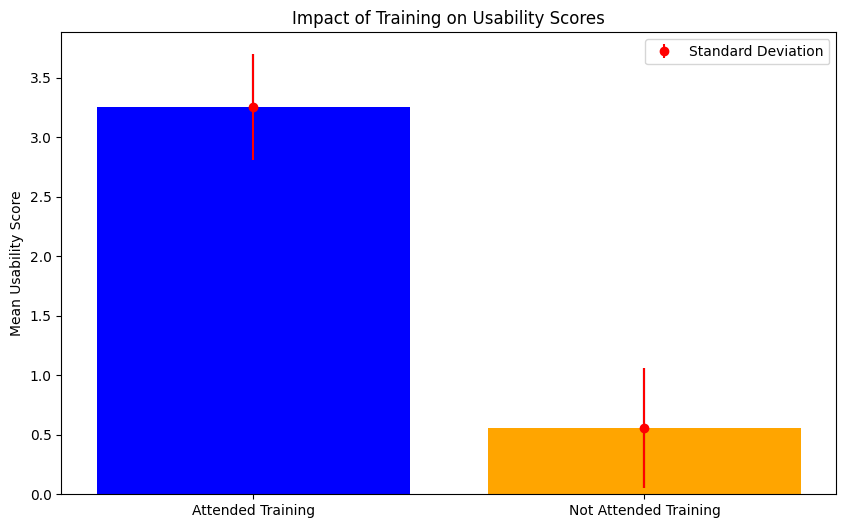

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Load the DataFrame and assume it contains the necessary columns
# Map 'Did you attend the training session for using the system?' to binary format
# Assuming 'data' is your DataFrame and the column exists
# Print values from the column where the values are equal to 1


data['Training Attendance Binary'] = data['Did you attend the training session for using the system?'].map({0: 0, 1: 0, 2: 1})


# Filter data based on training attendance, ignoring any placeholder values like -1
attended_training = data[data['Training Attendance Binary'] == 1]
not_attended_training = data[data['Training Attendance Binary'] == 0]

# Convert columns 42 to 46 to numeric, handling any non-numeric entries by coercing to NaN
cols_to_check = data.columns[42:46]
data[cols_to_check] = data[cols_to_check].apply(pd.to_numeric, errors='coerce')

# Calculate mean usability scores for each group
mean_usability_attended = attended_training[cols_to_check].mean(axis=1)
mean_usability_not_attended = not_attended_training[cols_to_check].mean(axis=1)

# Conduct an independent samples t-test to compare the mean scores between groups
t_stat, p_value = ttest_ind(mean_usability_attended.dropna(), mean_usability_not_attended.dropna(), equal_var=False)

# Print the t-test results
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

# Visualize the mean usability scores with standard deviations as error bars
std_attended = mean_usability_attended.std()
std_not_attended = mean_usability_not_attended.std()

plt.figure(figsize=(10, 6))
plt.bar(['Attended Training', 'Not Attended Training'], [mean_usability_attended.mean(), mean_usability_not_attended.mean()], color=['blue', 'orange'], yerr=[std_attended, std_not_attended])
plt.ylabel('Mean Usability Score')
plt.title('Impact of Training on Usability Scores')
plt.errorbar(['Attended Training', 'Not Attended Training'], [mean_usability_attended.mean(), mean_usability_not_attended.mean()], yerr=[std_attended, std_not_attended], fmt='o', color='red', label='Standard Deviation')
plt.legend()
plt.show()


## Analysis of Usability Scores Based on Training Attendance

### Key Elements of the Chart

- **Mean Usability Scores**:
  - The blue bar (Attended Training) is significantly higher than the orange bar (Not Attended Training), suggesting that those who attended training reported higher usability scores.

- **Error Bars (Standard Deviation)**:
  - The red error bars show the variability or standard deviation of the scores within each group. The presence of these error bars helps to visualize the spread and consistency of the scores.

- **T-Statistic and P-Value**:
  - **T-Statistic:** The t-statistic is quite high (30.474255574891), indicating a substantial difference between the means of the two groups.
  - **P-Value:** The p-value is extremely small (1.349685370308889e-42), far below any conventional significance level (e.g., 0.05, 0.01, or even 0.001).

### Interpretation Relative to the Hypothesis

- **Null Hypothesis (H0):** There is no significant difference in usability scores between those who attended training and those who did not.
- **Alternative Hypothesis (H1):** There is a significant difference in usability scores between those who attended training and those who did not.

#### Based on the t-statistic and p-value:

- The extremely low p-value allows us to reject the null hypothesis with very high confidence. This means that the evidence strongly supports the alternative hypothesis that attending training does affect system usability positively.

### Conclusion

- The analysis strongly disapproves of the null hypothesis and supports the alternative hypothesis. The visual and statistical results indicate that training has a significant positive impact on usability scores. The participants who attended training perceived the system as more usable than those who did not attend training. This outcome can inform decisions on the importance of training for enhancing user experience and system effectiveness.